In [37]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

In [189]:
data = pd.read_csv('s3data.csv', sep=";", decimal=",")
data.head()

,nombre,sesion,herr,FA1,PU1,AE1,RW1,RW2,FA2,AE2,PU2,FA3,PU3,AE3,RW3,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
0,Ana Maria Ospina,1.0,Arbimon,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.333333,3.000000,4.000000,3.333333,3.416667
1,Ana Maria Ospina,1.0,Bioviz 1,4.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,3.666667,4.000000,4.000000,4.333333,4.000000
2,Ana Maria Ospina,1.0,Bioviz 2,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.666667,4.000000,4.000000,4.000000,3.916667
3,Juan David García,1.0,Arbimon,3.0,4.0,2.0,4.0,4.0,2.0,2.0,1.0,4.0,5.0,3.0,2.0,3.000000,3.333333,3.333333,2.333333,3.000000
4,Juan David García,1.0,Bioviz 1,4.0,4.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,4.0,4.0,3.666667,4.666667,4.000000,4.666667,4.250000


In [190]:
data.dtypes

nombre       object
sesion      float64
herr         object
FA1         float64
PU1         float64
AE1         float64
RW1         float64
RW2         float64
FA2         float64
AE2         float64
PU2         float64
FA3         float64
PU3         float64
AE3         float64
RW3         float64
FATOTAL     float64
PUTOTAL     float64
RWTOTAL     float64
AETOTAL     float64
UESTOTAL    float64
dtype: object

In [191]:
data.describe(include="all")

,nombre,sesion,herr,FA1,PU1,AE1,RW1,RW2,FA2,AE2,PU2,FA3,PU3,AE3,RW3,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,54,54.000000,54,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
unique,12,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Karolina Fierro,NaN,Bioviz 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.333333,NaN,3.703704,3.777778,4.222222,4.185185,4.240741,3.425926,3.851852,3.296296,4.111111,3.796296,3.759259,3.870370,3.746914,3.623457,4.098765,3.944444,3.853395
std,NaN,0.475831,NaN,1.002443,1.093146,0.839287,0.675000,0.612301,0.923526,1.088662,1.191632,0.634441,0.876951,0.698656,0.728045,0.656958,0.866440,0.585032,0.757215,0.593672
min,NaN,1.000000,NaN,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.666667,2.333333,2.000000,2.333333
25%,NaN,1.000000,NaN,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.333333,3.000000,4.000000,3.416667,3.583333
50%,NaN,1.000000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.666667,3.666667,4.000000,4.000000,3.875000
75%,NaN,2.000000,NaN,4.000000,4.750000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.583333,4.250000


In [192]:
data.dtypes

nombre       object
sesion      float64
herr         object
FA1         float64
PU1         float64
AE1         float64
RW1         float64
RW2         float64
FA2         float64
AE2         float64
PU2         float64
FA3         float64
PU3         float64
AE3         float64
RW3         float64
FATOTAL     float64
PUTOTAL     float64
RWTOTAL     float64
AETOTAL     float64
UESTOTAL    float64
dtype: object

In [193]:
data.RW3 = data.RW3.astype(float)
data.FATOTAL = data.FATOTAL.astype(float)
data.PUTOTAL = data.PUTOTAL.astype(float)
data.RWTOTAL = data.RWTOTAL.astype(float)
data.AETOTAL = data.AETOTAL.astype(float)


data.dtypes

nombre       object
sesion      float64
herr         object
FA1         float64
PU1         float64
AE1         float64
RW1         float64
RW2         float64
FA2         float64
AE2         float64
PU2         float64
FA3         float64
PU3         float64
AE3         float64
RW3         float64
FATOTAL     float64
PUTOTAL     float64
RWTOTAL     float64
AETOTAL     float64
UESTOTAL    float64
dtype: object

# Dataset: dataTotales (Sesiones Unidas)
Dataset que contiene los datos sumados de todas las variables del Engagement con ambas sesiones unidas

In [194]:
dataTotales = data[['nombre', 'sesion', 'herr', 'FATOTAL', 'PUTOTAL', 'RWTOTAL', 'AETOTAL', 'UESTOTAL']]

In [195]:
dataTotales.head()

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
0,Ana Maria Ospina,1.0,Arbimon,3.333333,3.000000,4.000000,3.333333,3.416667
1,Ana Maria Ospina,1.0,Bioviz 1,3.666667,4.000000,4.000000,4.333333,4.000000
2,Ana Maria Ospina,1.0,Bioviz 2,3.666667,4.000000,4.000000,4.000000,3.916667
3,Juan David García,1.0,Arbimon,3.000000,3.333333,3.333333,2.333333,3.000000
4,Juan David García,1.0,Bioviz 1,3.666667,4.666667,4.000000,4.666667,4.250000


In [196]:
dataTotales.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,54,54.000000,54,54.000000,54.000000,54.000000,54.000000,54.000000
unique,12,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Karolina Fierro,NaN,Bioviz 2,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,18,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.333333,NaN,3.746914,3.623457,4.098765,3.944444,3.853395
std,NaN,0.475831,NaN,0.656958,0.866440,0.585032,0.757215,0.593672
min,NaN,1.000000,NaN,2.000000,1.666667,2.333333,2.000000,2.333333
25%,NaN,1.000000,NaN,3.333333,3.000000,4.000000,3.416667,3.583333
50%,NaN,1.000000,NaN,3.666667,3.666667,4.000000,4.000000,3.875000
75%,NaN,2.000000,NaN,4.000000,4.000000,4.333333,4.583333,4.250000


### Datos Totales Engagement Bioviz 1

In [197]:
dataBioviz1 = dataTotales[dataTotales.herr == "Bioviz 1"]

dataBioviz1.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,18,18.000000,18,18.000000,18.000000,18.000000,18.000000,18.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Karolina Fierro,NaN,Bioviz 1,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,18,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.333333,NaN,3.851852,4.055556,4.370370,4.370370,4.162037
std,NaN,0.485071,NaN,0.562699,0.725358,0.410466,0.522549,0.452365
min,NaN,1.000000,NaN,3.000000,2.666667,4.000000,3.333333,3.500000
25%,NaN,1.000000,NaN,3.333333,3.666667,4.000000,4.000000,3.770833
50%,NaN,1.000000,NaN,3.666667,4.000000,4.333333,4.333333,4.250000
75%,NaN,2.000000,NaN,4.250000,4.666667,4.666667,4.666667,4.333333


### Datos Totales Engagement Bioviz 2

In [198]:
dataBioviz2 = dataTotales[dataTotales.herr == "Bioviz 2"]

dataBioviz2.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,18,18.000000,18,18.000000,18.000000,18.000000,18.000000,18.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Karolina Fierro,NaN,Bioviz 2,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,18,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.333333,NaN,4.037037,3.944444,4.277778,4.240741,4.125000
std,NaN,0.485071,NaN,0.455739,0.527046,0.431595,0.439928,0.360702
min,NaN,1.000000,NaN,3.333333,3.000000,3.666667,3.333333,3.500000
25%,NaN,1.000000,NaN,3.666667,3.666667,4.000000,4.000000,3.916667
50%,NaN,1.000000,NaN,4.000000,4.000000,4.166667,4.333333,4.041667
75%,NaN,2.000000,NaN,4.333333,4.000000,4.583333,4.666667,4.312500


### Datos Totales Engagement Arbimon

In [199]:
dataArbimon = dataTotales[dataTotales.herr == "Arbimon"]

"""AE_Arbimon = dataArbimon['AETOTAL'].sum()/54
print('Arbimon Apariencia Estética Total', AE_Arbimon)
PU_Arbimon = dataArbimon['PUTOTAL'].sum()/54
print('Arbimon Usabilidad Percibida Total', PU_Arbimon)
RW_Arbimon = dataArbimon['RWTOTAL'].sum()/54
print('Arbimon Gratificación Total', RW_Arbimon)
FA_Arbimon = dataArbimon['FATOTAL'].sum()/54
print('Arbimon Atención Enfocada Total', FA_Arbimon)"""

dataArbimon.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,18,18.000000,18,18.000000,18.000000,18.000000,18.000000,18.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Karolina Fierro,NaN,Arbimon,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,18,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.333333,NaN,3.351852,2.870370,3.648148,3.222222,3.273148
std,NaN,0.485071,NaN,0.745112,0.793263,0.620691,0.695457,0.478121
min,NaN,1.000000,NaN,2.000000,1.666667,2.333333,2.000000,2.333333
25%,NaN,1.000000,NaN,2.750000,2.083333,3.333333,2.666667,3.000000
50%,NaN,1.000000,NaN,3.333333,2.833333,3.666667,3.333333,3.416667
75%,NaN,2.000000,NaN,3.916667,3.583333,4.000000,3.666667,3.645833


# Dataset: dataTotales (Sesiones Separadas)
Dataset que contiene los datos sumados de todas las variables del Engagement con las dos sesiones separadas

In [200]:
dataSesion1 = dataTotales[dataTotales.sesion == 1]
dataSesion2 = dataTotales[dataTotales.sesion == 2]

### Datos Engagement Bioviz 1

In [201]:
#Sesión 1
dataBioviz1_S1 = dataSesion1[dataSesion1.herr == "Bioviz 1"]

dataBioviz1_S1.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,12,12.0,12,12.000000,12.000000,12.000000,12.000000,12.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Valentina Echeverry Soto,NaN,Bioviz 1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,12,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,NaN,3.750000,4.000000,4.416667,4.305556,4.118056
std,NaN,0.0,NaN,0.514929,0.696311,0.405144,0.558829,0.402734
min,NaN,1.0,NaN,3.000000,2.666667,4.000000,3.333333,3.500000
25%,NaN,1.0,NaN,3.333333,3.833333,4.000000,4.000000,3.729167
50%,NaN,1.0,NaN,3.666667,4.000000,4.333333,4.333333,4.250000
75%,NaN,1.0,NaN,4.083333,4.416667,4.750000,4.666667,4.333333


In [202]:
#Sesión 2
dataBioviz1_S2 = dataSesion2[dataSesion2.herr == "Bioviz 1"]

dataBioviz1_S2.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,6,6.0,6,6.000000,6.000000,6.000000,6.000000,6.000000
unique,6,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Juan David Quintero,NaN,Bioviz 1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.0,NaN,4.055556,4.166667,4.277778,4.500000,4.250000
std,NaN,0.0,NaN,0.646930,0.836660,0.443053,0.459468,0.570088
min,NaN,2.0,NaN,3.333333,3.000000,4.000000,4.000000,3.583333
25%,NaN,2.0,NaN,3.666667,3.666667,4.000000,4.083333,3.854167
50%,NaN,2.0,NaN,3.833333,4.166667,4.000000,4.500000,4.125000
75%,NaN,2.0,NaN,4.500000,4.916667,4.500000,4.916667,4.770833


### Datos Engagement Bioviz 2

In [203]:
#Sesión 1
dataBioviz2_S1 = dataSesion1[dataSesion1.herr == "Bioviz 2"]

dataBioviz2_S1.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,12,12.0,12,12.000000,12.000000,12.000000,12.000000,12.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Valentina Echeverry Soto,NaN,Bioviz 2,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,12,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,NaN,4.055556,4.000000,4.250000,4.222222,4.131944
std,NaN,0.0,NaN,0.445705,0.531816,0.494924,0.499158,0.383462
min,NaN,1.0,NaN,3.333333,3.333333,3.666667,3.333333,3.500000
25%,NaN,1.0,NaN,3.666667,3.666667,4.000000,3.916667,3.916667
50%,NaN,1.0,NaN,4.000000,4.000000,4.000000,4.333333,4.041667
75%,NaN,1.0,NaN,4.333333,4.166667,4.500000,4.666667,4.354167


In [204]:
#Sesión 2
dataBioviz2_S2 = dataSesion2[dataSesion2.herr == "Bioviz 2"]

dataBioviz2_S2.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,6,6.0,6,6.000000,6.000000,6.000000,6.000000,6.000000
unique,6,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Juan David Quintero,NaN,Bioviz 2,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.0,NaN,4.000000,3.833333,4.333333,4.277778,4.111111
std,NaN,0.0,NaN,0.516398,0.547723,0.298142,0.327731,0.344265
min,NaN,2.0,NaN,3.666667,3.000000,4.000000,4.000000,3.750000
25%,NaN,2.0,NaN,3.666667,3.666667,4.083333,4.000000,3.937500
50%,NaN,2.0,NaN,3.833333,3.833333,4.333333,4.166667,4.041667
75%,NaN,2.0,NaN,4.000000,4.000000,4.583333,4.583333,4.145833


### Datos Engagement Arbimon

In [205]:
#Sesión 1
arbimon_S1 = dataSesion1[dataSesion1.herr == "Arbimon"]

arbimon_S1.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,12,12.0,12,12.000000,12.000000,12.000000,12.000000,12.000000
unique,12,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Valentina Echeverry Soto,NaN,Arbimon,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,12,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,NaN,3.500000,2.944444,3.722222,3.250000,3.354167
std,NaN,0.0,NaN,0.784960,0.776333,0.722416,0.753778,0.488666
min,NaN,1.0,NaN,2.000000,1.666667,2.333333,2.000000,2.333333
25%,NaN,1.0,NaN,3.250000,2.500000,3.333333,2.583333,3.000000
50%,NaN,1.0,NaN,3.333333,3.000000,3.833333,3.333333,3.583333
75%,NaN,1.0,NaN,4.000000,3.416667,4.083333,3.750000,3.750000


In [206]:
#Sesión 2
arbimon_S2 = dataSesion2[dataSesion2.herr == "Arbimon"]

arbimon_S2.describe(include="all")

,nombre,sesion,herr,FATOTAL,PUTOTAL,RWTOTAL,AETOTAL,UESTOTAL
count,6,6.0,6,6.000000,6.000000,6.000000,6.000000,6.000000
unique,6,NaN,1,NaN,NaN,NaN,NaN,NaN
top,Juan David Quintero,NaN,Arbimon,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,6,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.0,NaN,3.055556,2.722222,3.500000,3.166667,3.111111
std,NaN,0.0,NaN,0.611616,0.879815,0.349603,0.623610,0.452360
min,NaN,2.0,NaN,2.333333,2.000000,3.000000,2.333333,2.416667
25%,NaN,2.0,NaN,2.666667,2.083333,3.333333,2.750000,2.875000
50%,NaN,2.0,NaN,3.000000,2.333333,3.500000,3.166667,3.166667
75%,NaN,2.0,NaN,3.333333,3.333333,3.666667,3.583333,3.395833


# GRÁFICAS

## Variables del engagement vs Herramienta (Box-Plot) con las dos sesiones unidas

### Apariencia estética total vs Herramienta

[(0, 5.5)]

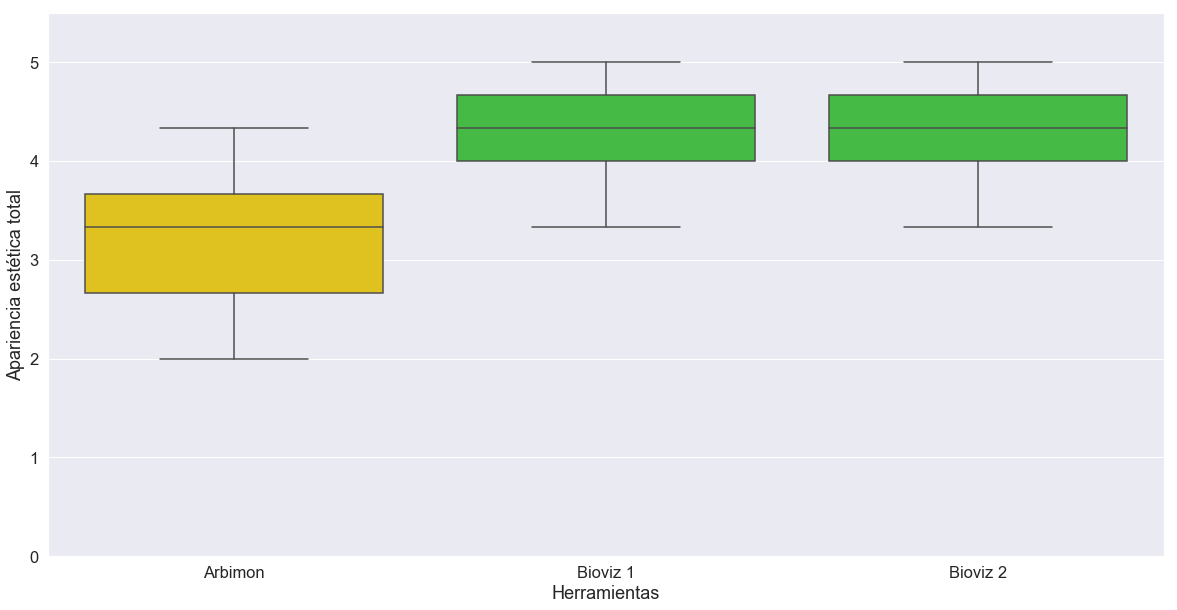

In [207]:
plt.figure(figsize=(20, 10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
fig = sns.boxplot(x="herr", y="AETOTAL", data=dataTotales, palette=my_pal)
fig.set(xlabel='Herramientas', ylabel='Apariencia estética total')
fig.set(ylim=(0,5.5))

### Usabilidad percibida total vs Herramienta

[(0, 5.5)]

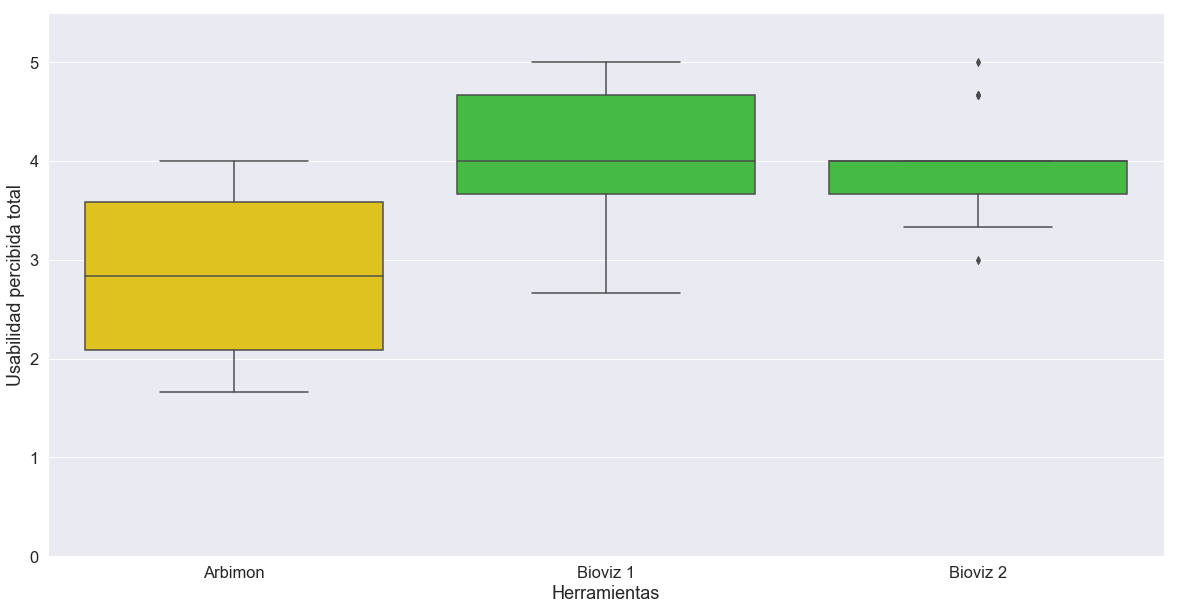

In [208]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
fig = sns.boxplot(x="herr", y="PUTOTAL", data=dataTotales, palette=my_pal)
fig.set(xlabel='Herramientas', ylabel='Usabilidad percibida total')
fig.set(ylim=(0,5.5))

### Gratificación total vs Herramienta

[(0, 5.5)]

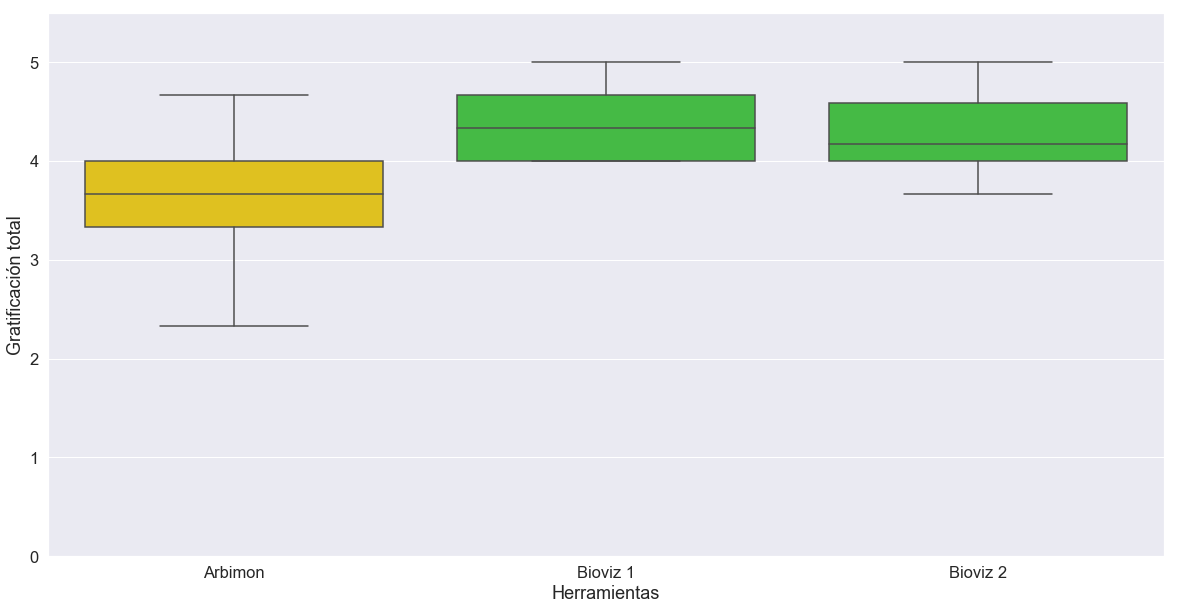

In [209]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
fig = sns.boxplot(x="herr", y="RWTOTAL", data=dataTotales, palette=my_pal)
fig.set(xlabel='Herramientas', ylabel='Gratificación total')
fig.set(ylim=(0,5.5))

### Atención enfocada total vs Herramienta

[(0, 5.5)]

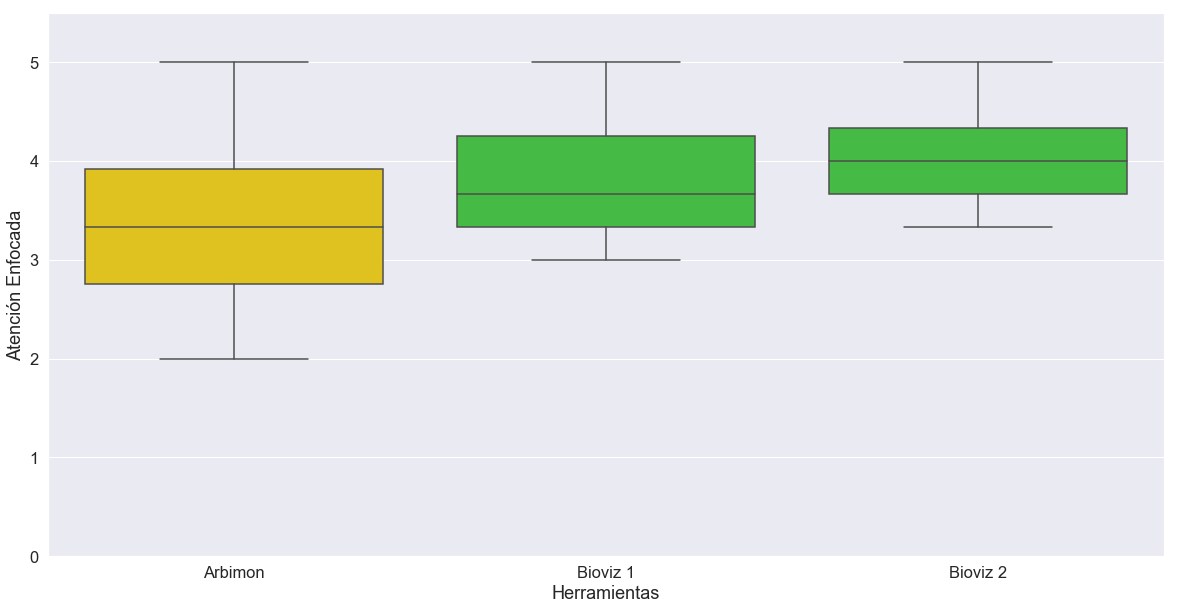

In [210]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
fig = sns.boxplot(x="herr", y="FATOTAL", data=dataTotales, palette=my_pal)
fig.set(xlabel='Herramientas', ylabel='Atención Enfocada')
fig.set(ylim=(0,5.5))

## Variables del engagement vs Herramienta (Bar-Plot) con las dos sesiones unidas

### Apariencia estética total (AE) vs Herramienta

[(0, 5)]

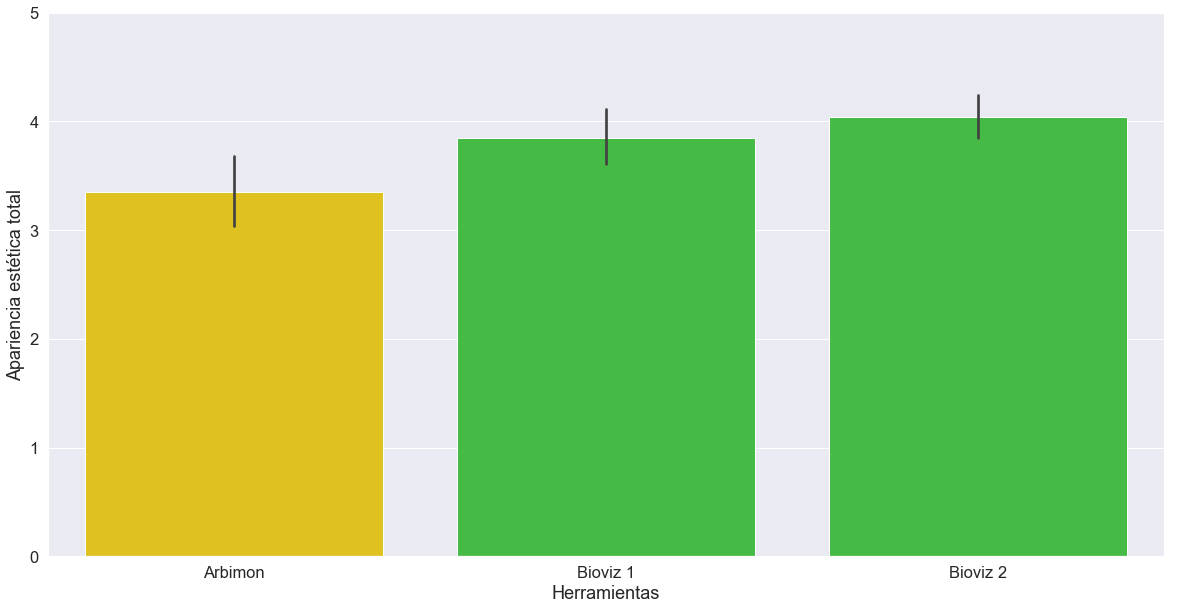

In [211]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="FATOTAL", data=dataTotales, palette=my_pal)
ax.set(xlabel='Herramientas', ylabel='Apariencia estética total')
ax.set(ylim=(0,5))

### Usabilidad percibida total (PU) vs Herramienta

[(0, 5)]

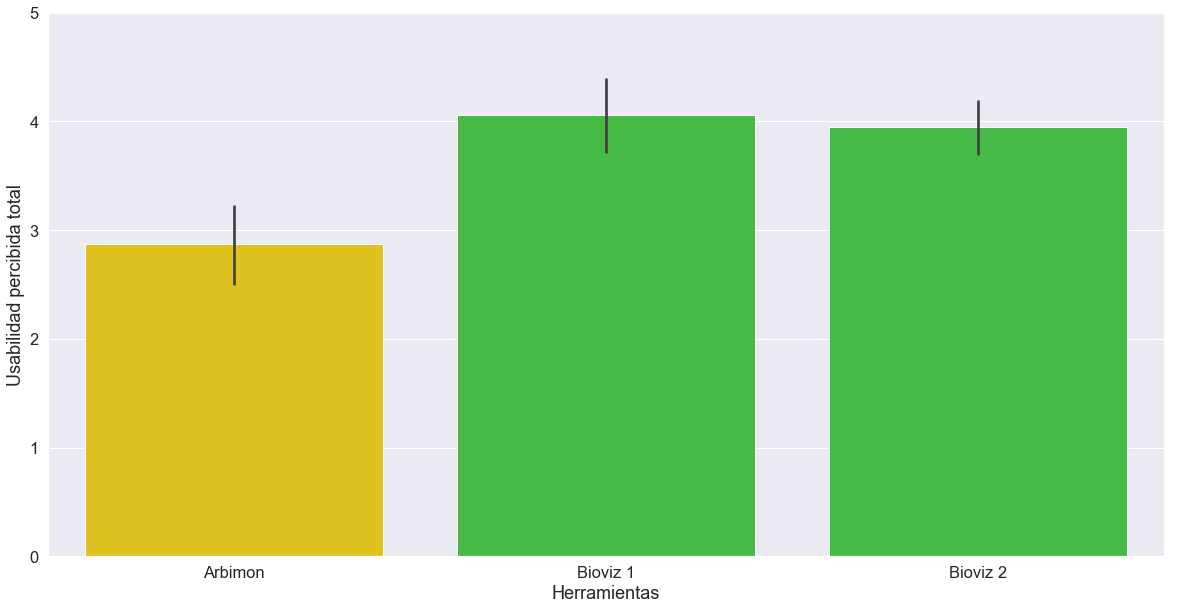

In [212]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="PUTOTAL", data=dataTotales, palette=my_pal)
ax.set(xlabel='Herramientas', ylabel='Usabilidad percibida total')
ax.set(ylim=(0,5))

### Gratificación total (RW) vs Herramienta

[(0, 5)]

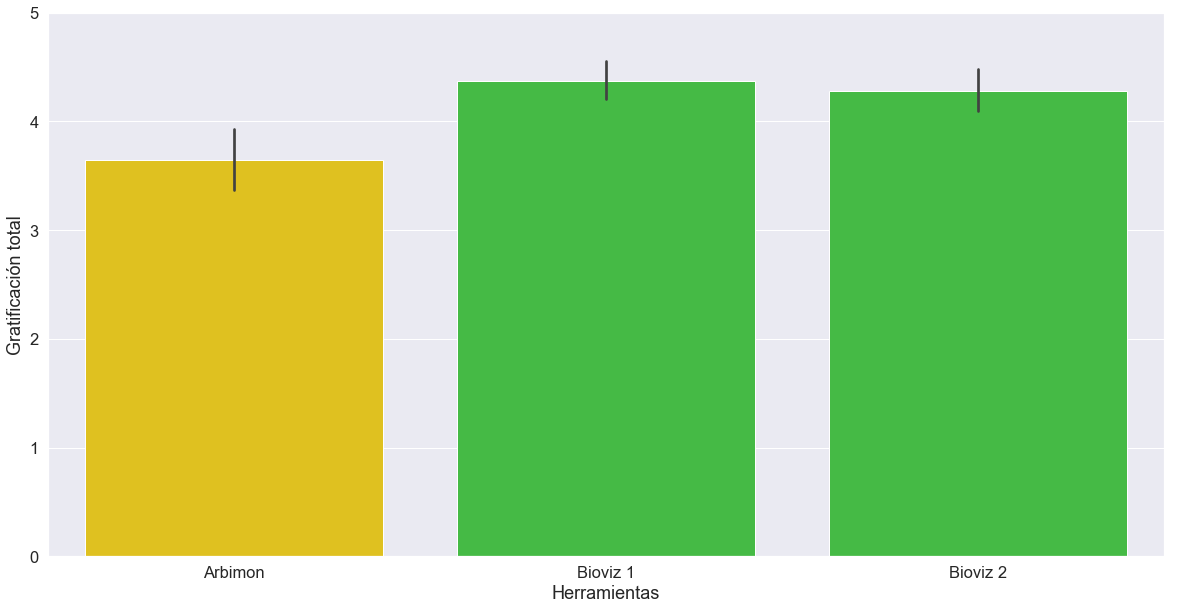

In [213]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="RWTOTAL", data=dataTotales, palette=my_pal)
ax.set(xlabel='Herramientas', ylabel='Gratificación total')
ax.set(ylim=(0,5))

### Atención enfocada total (FA) vs Herramienta

[(0, 5)]

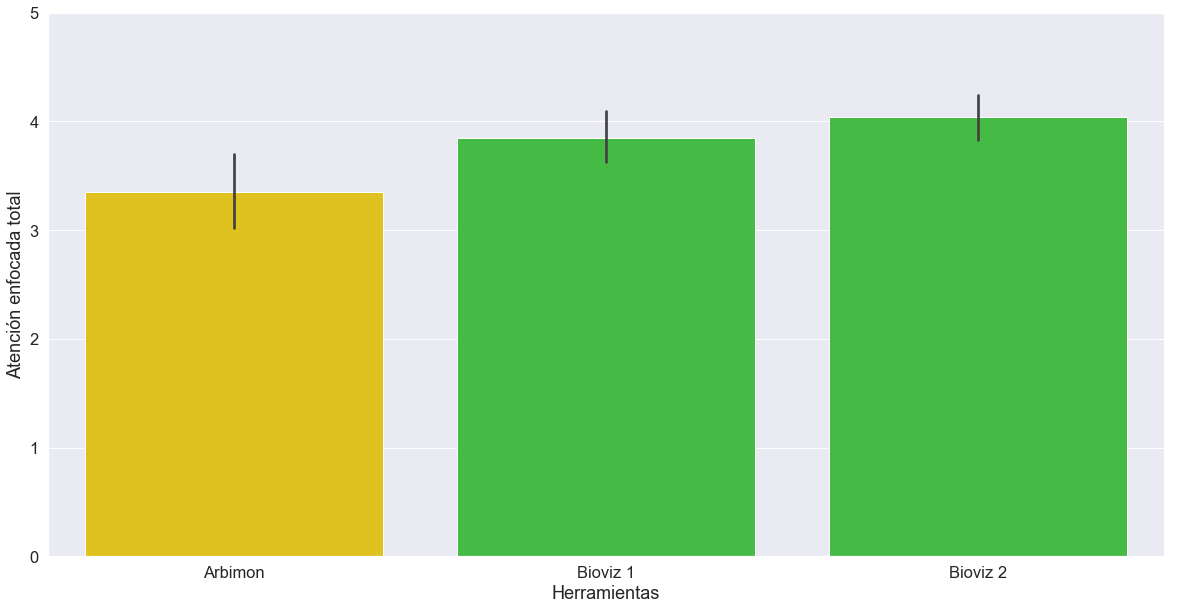

In [214]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen"}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="FATOTAL", data=dataTotales, palette=my_pal)
ax.set(xlabel='Herramientas', ylabel='Atención enfocada total')
ax.set(ylim=(0,5))

# Variables del engagement vs Herramienta (Bar-Plot) con las dos sesiones separadas

### Apariencia estética (AE) vs Herramienta por sesión

[(0, 5)]

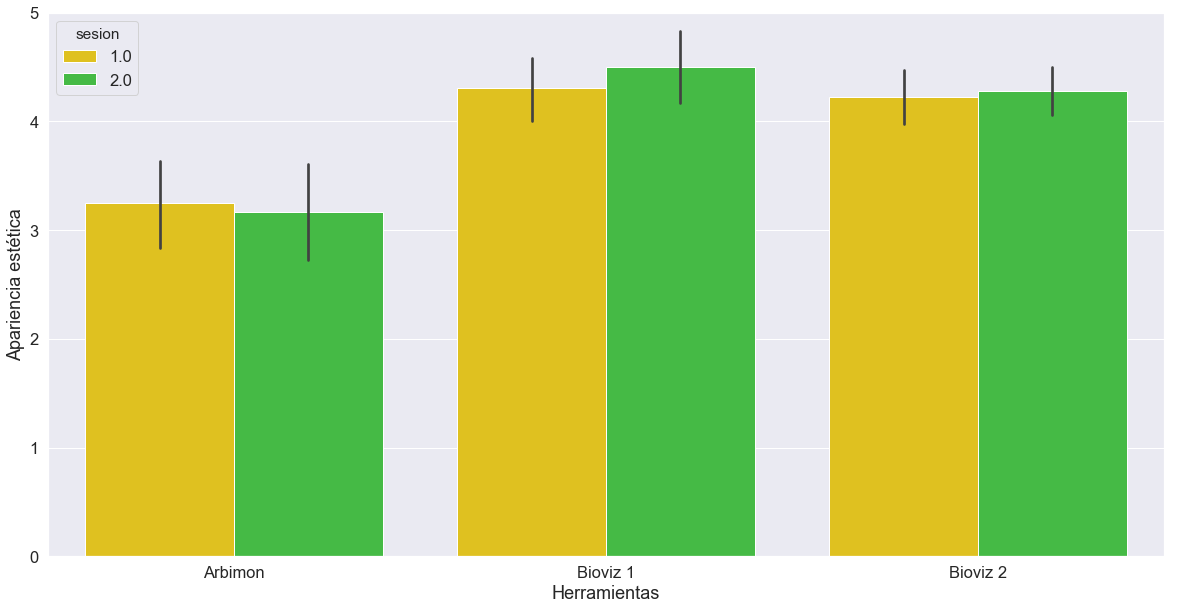

In [215]:
plt.figure(figsize=(20,10))
my_pal = {"gold", "limegreen"}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="AETOTAL", hue="sesion", data=dataTotales, palette=my_pal)
ax.set(xlabel='Herramientas', ylabel='Apariencia estética')
ax.set(ylim=(0,5))

### Usabilidad percibida (PU) vs Herramienta por sesión

[(0, 5)]

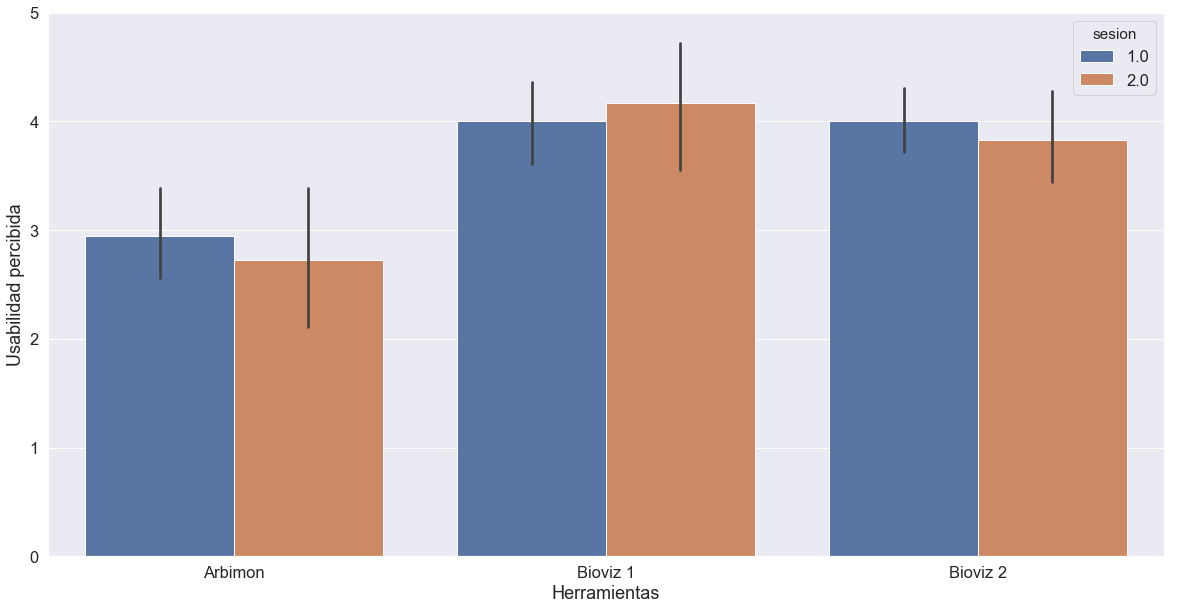

In [216]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen",}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="PUTOTAL", hue="sesion", data=dataTotales)
ax.set(xlabel='Herramientas', ylabel='Usabilidad percibida')
ax.set(ylim=(0,5))

### Gratificación (RW) vs Herramienta por sesión

[(0, 5)]

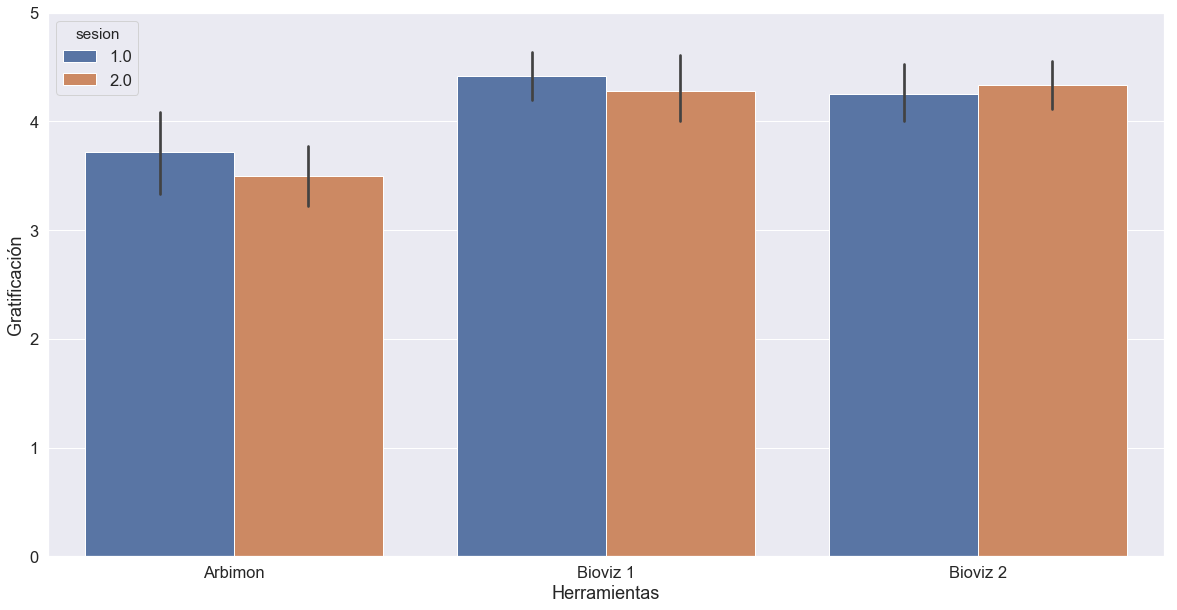

In [217]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen",}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="RWTOTAL", hue="sesion", data=dataTotales)
ax.set(xlabel='Herramientas', ylabel='Gratificación')
ax.set(ylim=(0,5))

### Atención enfocada vs Herramienta por sesión

[(0, 5)]

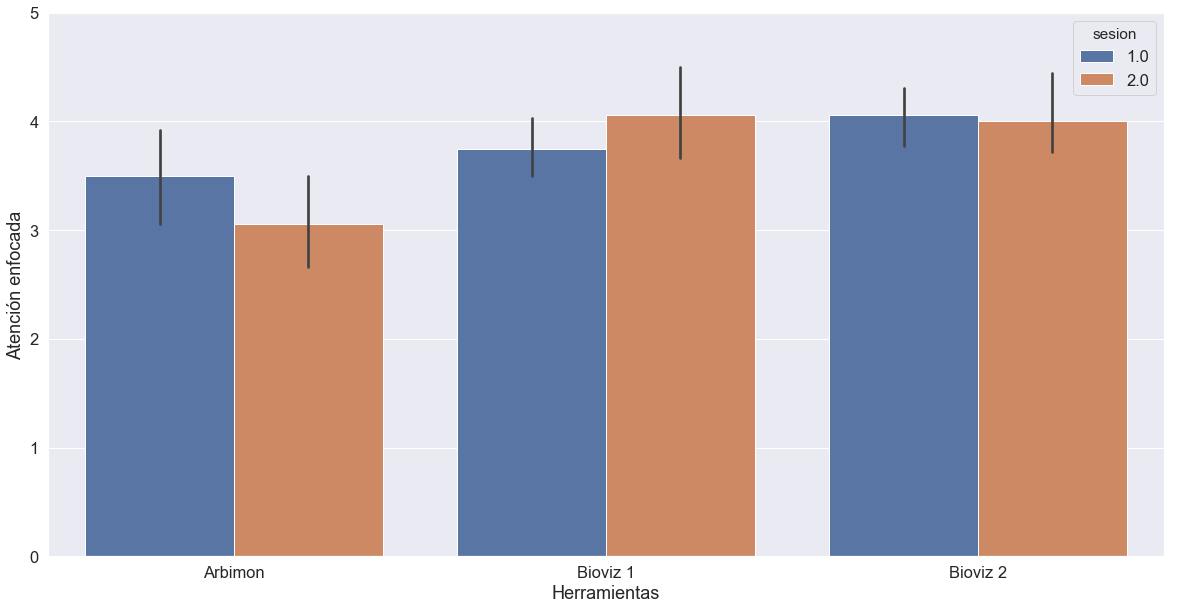

In [218]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen",}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="FATOTAL", hue="sesion", data=dataTotales)
ax.set(xlabel='Herramientas', ylabel='Atención enfocada')
ax.set(ylim=(0,5))

### Engagement general vs Herramienta por sesión

[(0, 5)]

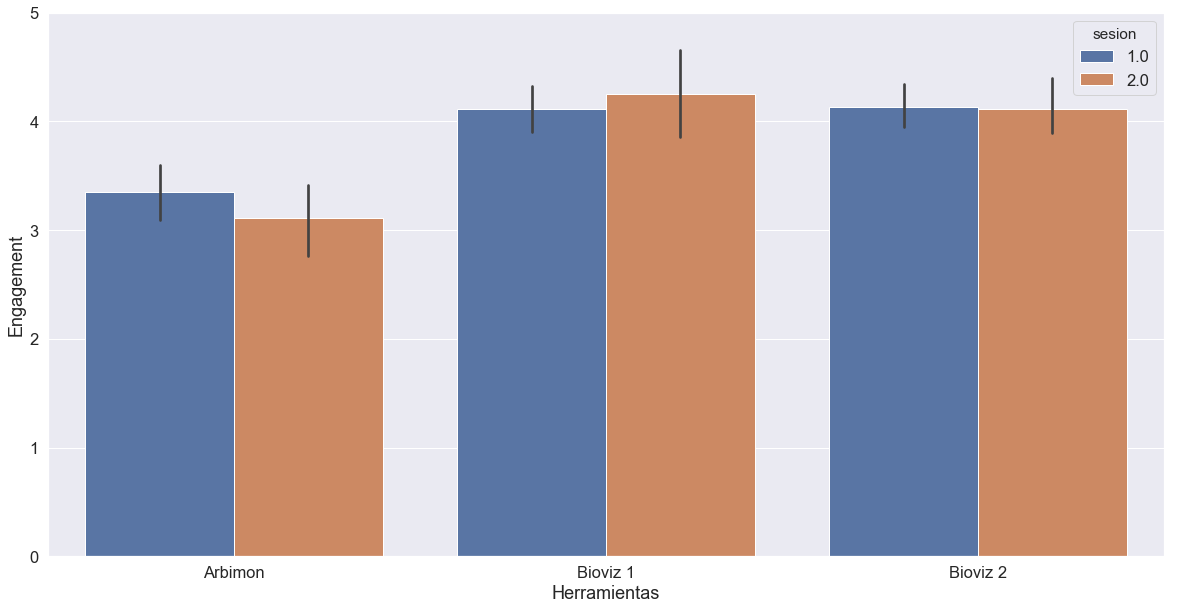

In [220]:
plt.figure(figsize=(20,10))
my_pal = {"Arbimon": "gold", "Bioviz 1": "limegreen", "Bioviz 2":"limegreen",}
sns.set(font_scale=1.5)
ax = sns.barplot(x="herr", y="UESTOTAL", hue="sesion", data=dataTotales)
ax.set(xlabel='Herramientas', ylabel='Engagement')
ax.set(ylim=(0,5))